# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results,on="Mouse ID")
# Display the data table for preview


In [2]:
merged_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#df.loc[(df["POSTAL COMMUNITY"] == "PRAIRIEVILLE") & (df["STREET FULL NAME"] == "BLUFF RD"), :]
#duplicate=merged_df.loc[:,(merged_df["Mouse ID"]==merged_df["Mouse ID"])&(merged_df["Timepoint"]==merged_df["Timepoint"])]
#Bethany helped
duplicate=merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:

merged_df=merged_df.loc[merged_df["Mouse ID"]!="g989"]


merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
len(merged_df["Mouse ID"].unique())

248

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [9]:
# Checking the number of mice in the clean DataFrame.
len(merged_df["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
merged_df["Tumor Volume (mm3)"].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
types_grouped_df=merged_df.groupby('Drug Regimen')
 
drug_means=merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_median=merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_var=merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_std=merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_SEM=merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

drug_df=pd.DataFrame({"Mean":drug_means, "Median":drug_median, "Var":drug_var, "Std":drug_std, "SEM":drug_SEM})

drug_df   

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_tumor=merged_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
tumor_df=pd.DataFrame(summary_tumor)
tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

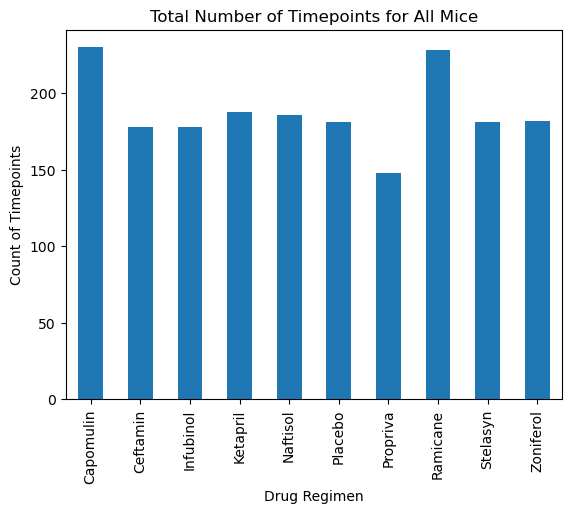

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = types_grouped_df['Timepoint'].count()
timepoints_chart = total_timepoints.plot(kind="bar", title="Total Number of Timepoints for All Mice")
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("Count of Timepoints")

plt.show()
plt.tight_layout()


In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_types=[]
for x in tumor_df.index:
    drug_types.append(tumor_df.index)    


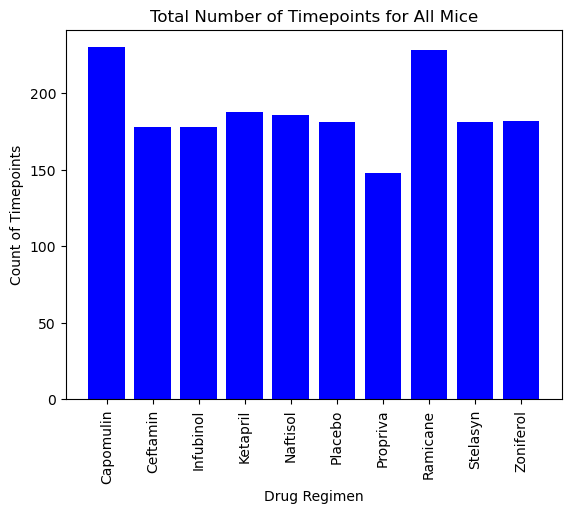

In [15]:
plt.bar(drug_types[0], total_timepoints, facecolor="blue", alpha=1, align="center")
plt.title("Total Number of Timepoints for All Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Timepoints")
plt.xticks(rotation="vertical")
plt.show()

In [16]:
#m_vs_f_df=merged_df.groupby('Sex')
m_vs_f=merged_df.groupby('Sex')["Sex"].count()
m_vs_f


Sex
Female    922
Male      958
Name: Sex, dtype: int64

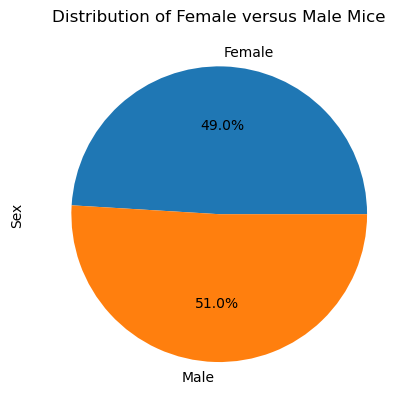

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


m_vs_f_chart = m_vs_f.plot(kind="pie", y='Sex', title="Distribution of Female versus Male Mice", autopct="%1.1f%%")

In [18]:
m_vs_f.keys()


Index(['Female', 'Male'], dtype='object', name='Sex')

In [19]:
Sex=[m_vs_f["Male"], m_vs_f["Female"]]
Sex

[958, 922]

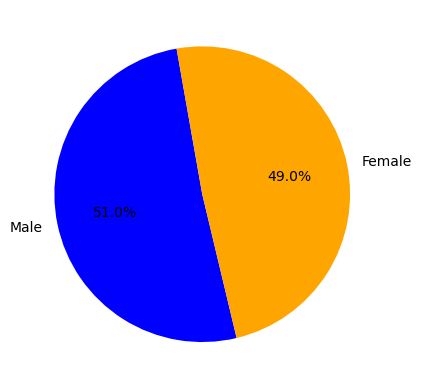

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]

# The values of each section of the pie chart
Sex

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(Sex, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=False, startangle=100)
#plt.title('Distribution of Female versus Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
#time_point=merged_df.groupby('Timepoint')
#merged_df[(merged_df["Metastatic Sites"]==4)|(merged_df["Metastatic Sites"]==2)]

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


#time_point.max()
#https://stackoverflow.com/questions/27488080/python-pandas-filter-rows-after-groupby
#mouse_id=merged_df.loc[merged_df.groupby(["Mouse ID"])["Timepoint"].idxmax()] 
#help from Bethany
mouse_id=merged_df.groupby(["Mouse ID"])["Timepoint"].max()
#mouse_id=merged_df.groupby('Mouse ID').max(["Timepoint"])(['Drug Regimen']==("Capomulin" | "Ramicane" | "Infubinol" | "Ceftamin"))


#https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
#mouse_id=mouse_id.loc[mouse_id['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_id=mouse_id.reset_index()
merger_df2=mouse_id.merge(merged_df, on=['Mouse ID', 'Timepoint'], how="left")
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merger_df2
merger_df2=merger_df2.loc[merger_df2['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
merger_df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments=[]
#merged_df["Drug Regimen"].unique()
for x in merger_df2[("Drug Regimen")].unique():
    list_treatments.append(x)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = merger_df2['Tumor Volume (mm3)'].quantile(0.25)
Q3 = merger_df2['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
update_IQR=IQR*1.5

lower_bound=Q1-update_IQR
upper_bound=Q3+update_IQR
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in list_treatments:
    volume=merger_df2.loc[merger_df2["Drug Regimen"]==x, 'Tumor Volume (mm3)']
    tumor_vol.append(volume)
    Q1 = volume.quantile(0.25)
    Q3 = volume.quantile(0.75)
    IQR = Q3 - Q1
    update_IQR=IQR*1.5

    lower_bound=Q1-update_IQR
    upper_bound=Q3+update_IQR
    outliers=volume.loc[(volume<lower_bound) | (volume>upper_bound)]
    print(outliers)
    # add subset 

    
    # Determine outliers using upper and lower bounds

    

31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [24]:
Q1

32.37735684

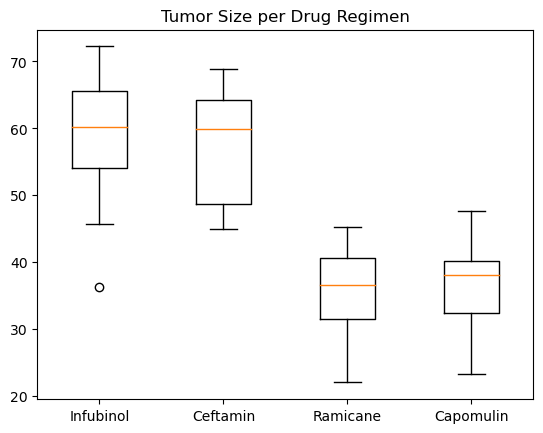

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size per Drug Regimen')

ax1.boxplot(tumor_vol, labels=list_treatments)
plt.show()


## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


merger_df2.loc[merger_df2["Drug Regimen"]=="Capomulin"]


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [33]:
mouse_data=merged_df.loc[merged_df["Mouse ID"]=="b128"]
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


Text(0.5, 1.0, 'Tumor Volume Over Time for Mouse b128')

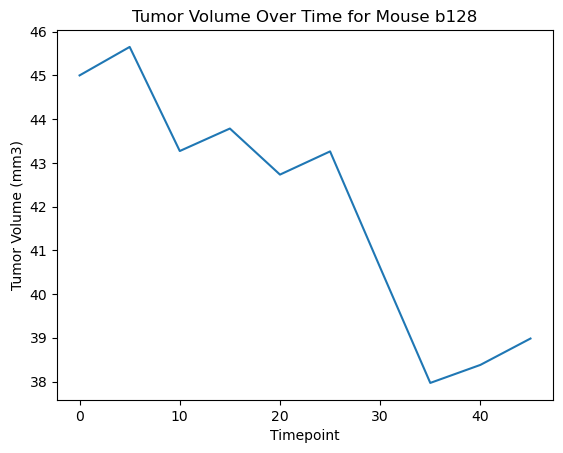

In [42]:
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse b128")

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

